In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [20]:
data = pd.read_csv('finalOrig.txt', sep=' ', header=None)
data.columns = ['x', 'y', 'w', 's', 'u', 'v']
data.sort_values(by=['x', 'y'], inplace=True)
Nx = 201
Ny = 201
print(data.head())
print(data.shape)
data = data.iloc[0:Nx*Ny, :]

     x      y         w    s    u    v
0  0.0  0.000  0.000000  0.0  0.0  0.0
1  0.0  0.005  0.001856  0.0  0.0  0.0
2  0.0  0.010  0.000513  0.0  0.0  0.0
3  0.0  0.015 -0.005671  0.0  0.0  0.0
4  0.0  0.020 -0.016483  0.0  0.0  0.0
(40401, 6)


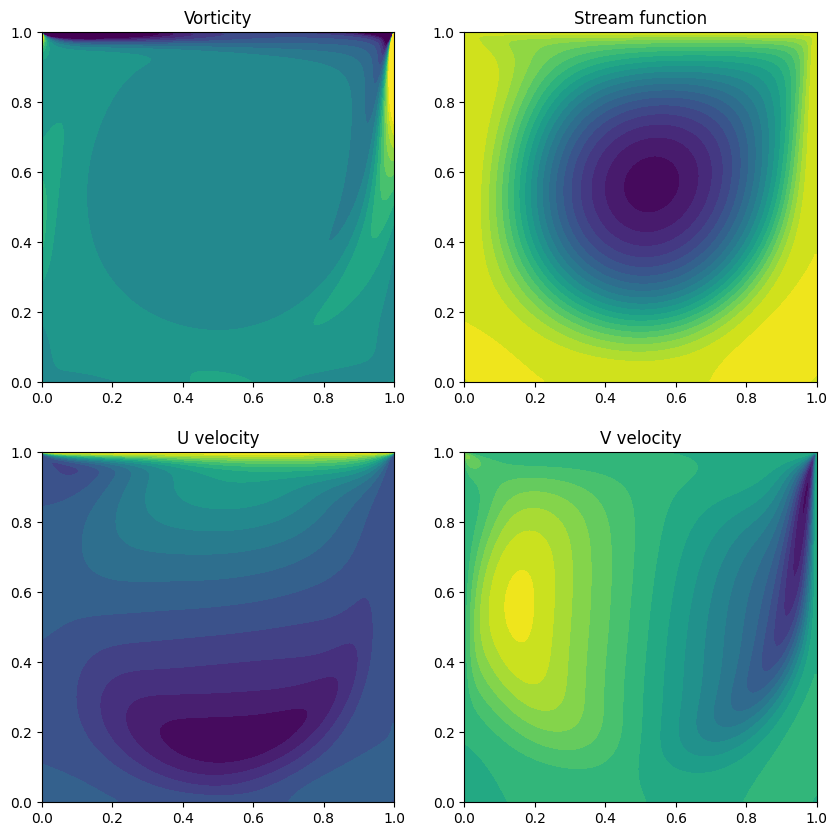

In [19]:
X = data['x'].values.reshape(Nx, Ny)
Y = data['y'].values.reshape(Nx, Ny)
W = data['w'].values.reshape(Nx, Ny)
S = data['s'].values.reshape(Nx, Ny)
U = data['u'].values.reshape(Nx, Ny)
V = data['v'].values.reshape(Nx, Ny)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.contourf(X, Y, W, 20, cmap='viridis',vmin=-25, vmax=25,levels=200)
# plt.colorbar()
plt.title('Vorticity')
plt.subplot(2, 2, 2)
plt.contourf(X, Y, S, 20, cmap='viridis')
plt.title('Stream function')
plt.subplot(2, 2, 3)
plt.contourf(X, Y, U, 20, cmap='viridis')
plt.title('U velocity')
plt.subplot(2, 2, 4)
plt.contourf(X, Y, V, 20, cmap='viridis')
plt.title('V velocity')
# plt.colorbar()
plt.show()

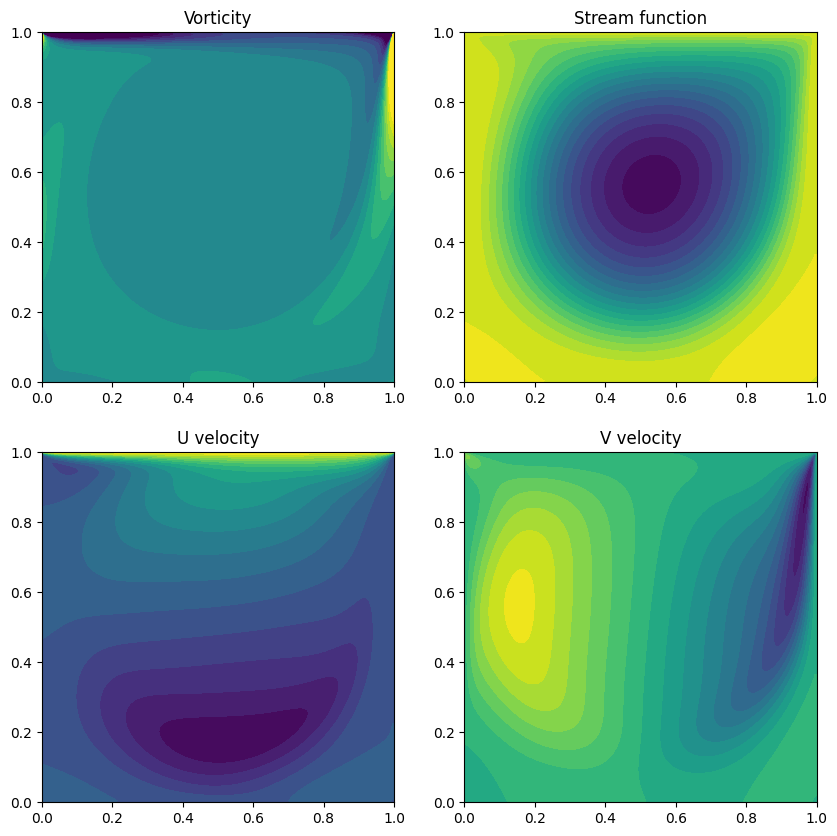

In [22]:
X = data['x'].values.reshape(Nx, Ny)
Y = data['y'].values.reshape(Nx, Ny)
W = data['w'].values.reshape(Nx, Ny)
S = data['s'].values.reshape(Nx, Ny)
U = data['u'].values.reshape(Nx, Ny)
V = data['v'].values.reshape(Nx, Ny)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.contourf(X, Y, W, 20, cmap='viridis',vmin=-25, vmax=25,levels=200)
plt.title('Vorticity')
plt.subplot(2, 2, 2)
plt.contourf(X, Y, S, 20, cmap='viridis')
plt.title('Stream function')
plt.subplot(2, 2, 3)
plt.contourf(X, Y, U, 20, cmap='viridis')
plt.title('U velocity')
plt.subplot(2, 2, 4)
plt.contourf(X, Y, V, 20, cmap='viridis')
plt.title('V velocity')
plt.show()

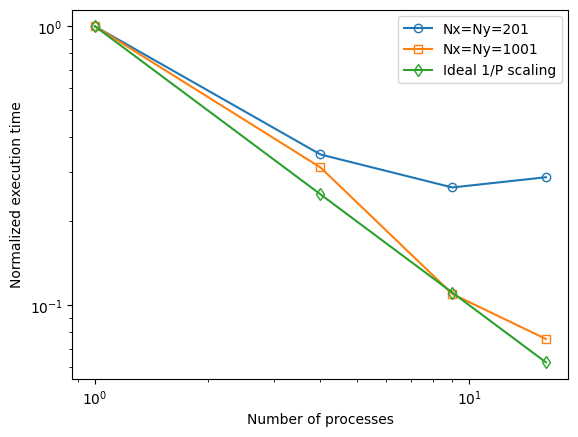

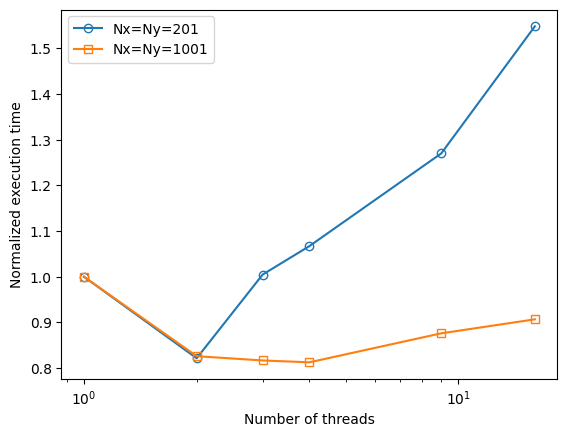

In [72]:
N1 = np.array([1,4,9,16])
T1 = np.array([17.16,			5.96,		4.54,	4.94])
T2 = np.array([183.85,			57.38,		20.20,	13.93])
N2 = np.array([1,2,3,4,9,16])
T3 = np.array([17.16,	14.10,	17.24,	18.31,		21.79,	26.56])
T4 = np.array([193.85,	160.15,	158.34,	157.55,		169.85,	175.78])

plt.plot(N1, T1/T1[0], label='Nx=Ny=201', marker='o',fillstyle='none')
plt.plot(N1, T2/T2[0], label='Nx=Ny=1001', marker='s',fillstyle='none')
plt.plot(N1,1/N1, label='Ideal 1/P scaling', marker='d',fillstyle='none')
plt.xlabel('Number of processes')
plt.ylabel('Normalized execution time')
plt.gca().set_yscale('log')
plt.legend()
plt.gca().set_xscale('log')
plt.show()

plt.plot(N2, T3/T3[0], label='Nx=Ny=201', marker='o',fillstyle='none')
plt.plot(N2, T4/T4[0], label='Nx=Ny=1001', marker='s',fillstyle='none')
plt.xlabel('Number of threads')
plt.ylabel('Normalized execution time')
# plt.gca().set_yscale('log')
plt.legend()
plt.gca().set_xscale('log')
plt.show()



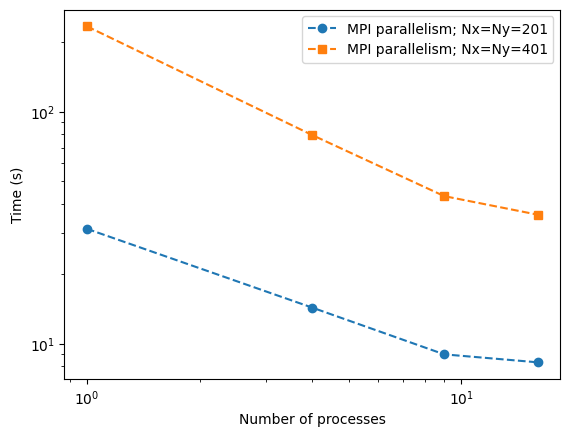

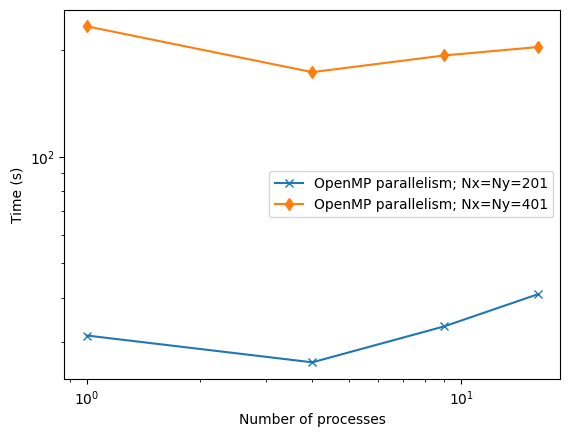

In [44]:
import datetime
import time
def f(time_str):
    # Split the string into minutes and the rest (seconds.milliseconds)
    minutes, sec_millis = time_str.split(":")
    # Split the seconds and milliseconds
    seconds, millis = sec_millis.split(".")
    # Convert minutes, seconds, and milliseconds to integers
    minutes = int(minutes)
    seconds = int(seconds)
    millis = int(millis)
    # Calculate the total time in seconds
    total_seconds = minutes * 60 + seconds + millis / 1000.0
    return total_seconds

N	= [1		,4		,9		,16]
T 	= ['0:31.268'	,'0:14.306','0:09.002','0:08.318']	#(Nx = 201, Nt = 100, MPI)
T2	= ['3:52.937'	,'1:19.194'	,'0:43.240','0:35.964']	#(Nx = 401, Nt = 100, MPI)
T3	= ['0:31.268'	,'0:26.271'	,'0:33.175'	,'0:40.864']	#(Nx = 201, Nt = 100, OMP)
T4	= ['3:52.937'	,'2:52.981','3:12.770'	,'3:23.593']	#(Nx = 401, Nt = 100, OMP)
T = [f(t) for t in T]
T2 = [f(t) for t in T2]
T3 = [f(t) for t in T3]
T4 = [f(t) for t in T4]

plt.plot(N, T, label='MPI parallelism; Nx=Ny=201', marker='o',linestyle='--')
plt.plot(N, T2, label='MPI parallelism; Nx=Ny=401', marker='s',linestyle='--')
plt.xlabel('Number of processes')
plt.ylabel('Time (s)')
plt.gca().set_yscale('log')
plt.legend()
plt.gca().set_xscale('log')
plt.show()
plt.plot(N, T3, label='OpenMP parallelism; Nx=Ny=201', marker='x')
plt.plot(N, T4, label='OpenMP parallelism; Nx=Ny=401', marker='d')
plt.xlabel('Number of processes')
plt.ylabel('Time (s)')
plt.gca().set_yscale('log')
plt.legend()
plt.gca().set_xscale('log')